## AWnet test

In [1]:
from awnet import pwc_5x5_sigmoid_bilinear   # cm:import AWnet model
import torch
from torchvision import transforms, utils

AWnet = pwc_5x5_sigmoid_bilinear.pwc_residual().cuda()
# AWnet.load_state_dict(torch.load('awnet/fs_guided_size1_ColorJitter_12_all_0.03877976.pkl'))
AWnet.load_state_dict(torch.load('awnet/fs_34_all_0.03036882.pkl'))
AWnet = AWnet.eval()

import warnings
warnings.filterwarnings("ignore")

def fuseTwoImages(I, J_hat):
    with torch.no_grad():
        fusedTensor,warp,mask = AWnet(J_hat,I)
    return fusedTensor, warp, mask.unsqueeze(0)

ImportError: /home/qian/anaconda3/envs/pytorch/lib/python3.6/site-packages/correlation_cuda-0.0.0-py3.6-linux-x86_64.egg/correlation_cuda.cpython-36m-x86_64-linux-gnu.so: undefined symbol: _ZN3c1011CPUTensorIdEv

In [8]:
import torch
state_dict = torch.load('awnet/fs_34_all_0.03036882.pkl')
for param_tensor in state_dict:
    print(param_tensor, "\t", state_dict[param_tensor].size())

FlowNet.conv1a.0.weight 	 torch.Size([16, 3, 3, 3])
FlowNet.conv1a.0.bias 	 torch.Size([16])
FlowNet.conv1aa.0.weight 	 torch.Size([16, 16, 3, 3])
FlowNet.conv1aa.0.bias 	 torch.Size([16])
FlowNet.conv1b.0.weight 	 torch.Size([16, 16, 3, 3])
FlowNet.conv1b.0.bias 	 torch.Size([16])
FlowNet.conv2a.0.weight 	 torch.Size([32, 16, 3, 3])
FlowNet.conv2a.0.bias 	 torch.Size([32])
FlowNet.conv2aa.0.weight 	 torch.Size([32, 32, 3, 3])
FlowNet.conv2aa.0.bias 	 torch.Size([32])
FlowNet.conv2b.0.weight 	 torch.Size([32, 32, 3, 3])
FlowNet.conv2b.0.bias 	 torch.Size([32])
FlowNet.conv3a.0.weight 	 torch.Size([64, 32, 3, 3])
FlowNet.conv3a.0.bias 	 torch.Size([64])
FlowNet.conv3aa.0.weight 	 torch.Size([64, 64, 3, 3])
FlowNet.conv3aa.0.bias 	 torch.Size([64])
FlowNet.conv3b.0.weight 	 torch.Size([64, 64, 3, 3])
FlowNet.conv3b.0.bias 	 torch.Size([64])
FlowNet.conv4a.0.weight 	 torch.Size([96, 64, 3, 3])
FlowNet.conv4a.0.bias 	 torch.Size([96])
FlowNet.conv4aa.0.weight 	 torch.Size([96, 96, 3, 3])
F

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
####### 2K ###########
def patchize(img):
    imgs = []
    H, W, C = img.shape
    ph = H//2
    pw = W//2
    img_empty = np.zeros((H+200, W+200, C))
    img_empty[100:-100, 100:-100] = img
    img = img_empty
    for i in range(2):
        for j in range(2):
            imgs.append(img[100+ph*i-50:100+ph*i+ph+50, 100+pw*j-32:100+pw*j+pw+32])
    imgs = np.stack(imgs)
    return imgs

def depatchize(imgs, pd_h = 50, pd_w = 32):
    ph = (imgs[0].shape[0]-2*pd_h)
    pw = (imgs[0].shape[1]-2*pd_w)
    img = np.zeros((ph*2, pw*2, 3))
    for i in range(2):
        for j in range(2):
            img[i*ph:i*ph+ph, j*pw:j*pw+pw] = imgs[i*2+j, pd_h:-pd_h, pd_w:-pd_w]
            
    return img

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(24,12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
# ####### 4k ############
# def patchize(img):
#     imgs = []
#     H, W, C = img.shape
#     ph = H//4
#     pw = W//4
#     img_empty = np.zeros((H+300, W+300, C))
#     img_empty[150:-150, 150:-150] = img
#     img = img_empty
#     for i in range(4):
#         for j in range(4):
#             imgs.append(img[150+ph*i-114:150+ph*i+ph+114, 150+pw*j-32:150+pw*j+pw+32])
#     imgs = np.stack(imgs)
#     return imgs

# def depatchize(imgs, pd_h = 114, pd_w = 32):
#     ph = (imgs[0].shape[0]-2*pd_h)
#     pw = (imgs[0].shape[1]-2*pd_w)
#     img = np.zeros((ph*4, pw*4, 3))
#     for i in range(4):
#         for j in range(4):
#             img[i*ph:i*ph+ph, j*pw:j*pw+pw] = imgs[i*4+j, pd_h:-pd_h, pd_w:-pd_w]
            
#     return img

# def imshow(img):
#     #img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.figure(figsize=(24,12))
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

In [6]:
import time
# a = cv2.imread("/home/qian/Documents/datasets/rfc_data/scene/scene1/102/700.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
# b = cv2.imread("/home/qian/Documents/datasets/rfc_data/scene/scene1/103/500.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.imread("/home/qian/Desktop/7943_01.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("/home/qian/Desktop/7943_00.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a, None, fx=0.5,fy=0.5)
b = cv2.resize(b, None, fx=0.5,fy=0.5)
aa = patchize(a)
bb = patchize(b)
aa = torch.Tensor(aa.transpose(0, 3, 1, 2)).cuda()
bb = torch.Tensor(bb.transpose(0, 3, 1, 2)).cuda()

ccs = []
wws = []
mms = []
torch.cuda.synchronize()
start_time = time.time()
for i in range(4):
    cc, ww, mm = fuseTwoImages(aa[i:i+1], bb[i:i+1])
    ccs.append(cc[0])
    wws.append(ww[0])
    mms.append(mm[0])
torch.cuda.synchronize()
print("runtime:", time.time()-start_time)
cc = torch.stack(ccs)
ww = torch.stack(wws)
mm = torch.stack(mms)

c = depatchize(cc.cpu().detach().numpy().transpose(0, 2, 3, 1))
c = np.clip(c, 0, 1)
warp = depatchize(ww.cpu().detach().numpy().transpose(0, 2, 3, 1))
mask = depatchize(mm.cpu().detach().numpy().transpose(0, 2, 3, 1))
# cv2.imwrite("rl_frames/1550fimg_00.jpg", c[..., ::-1] * 255.0)

runtime: 4.818536043167114


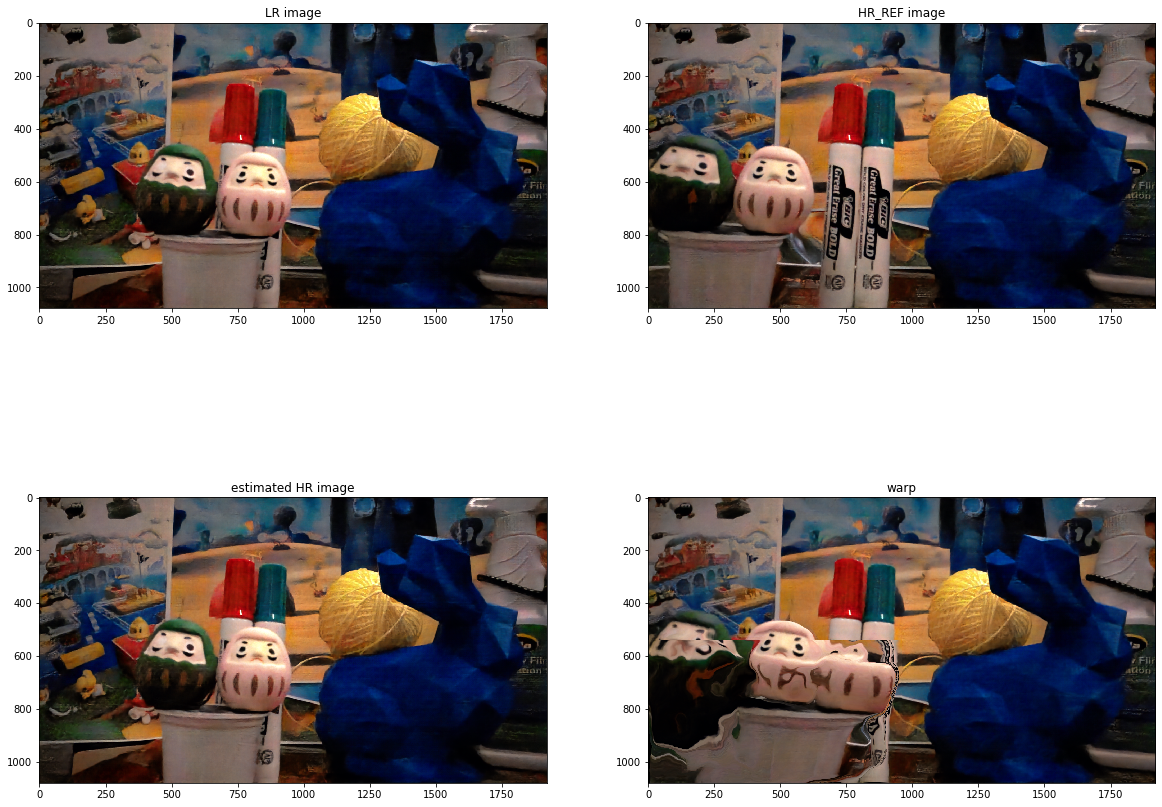

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(a) #cv2.resize(a, (896, 512))
ax[0][0].set_title('LR image')
ax[0][1].imshow(b)
ax[0][1].set_title('HR_REF image')
ax[1][0].imshow(c)
ax[1][0].set_title('estimated HR image')
ax[1][1].imshow(warp)
ax[1][1].set_title('warp')
plt.show()

In [9]:
a = cv2.imread("/home/qian/Desktop/7943_03.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
# b = cv2.imread("/home/qian/Desktop/80981_s1000_01.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a, None, fx=0.5,fy=0.5)
b = c#cv2.resize(b, None, fx=0.5,fy=0.5)
aa = patchize(a)
bb = patchize(b)
aa = torch.Tensor(aa.transpose(0, 3, 1, 2)).cuda()
bb = torch.Tensor(bb.transpose(0, 3, 1, 2)).cuda()

ccs = []
wws = []
mms = []
torch.cuda.synchronize()
start_time = time.time()
for i in range(4):
    cc, ww, mm = fuseTwoImages(aa[i:i+1], bb[i:i+1])
    ccs.append(cc[0])
    wws.append(ww[0])
    mms.append(mm[0])
torch.cuda.synchronize()
print("runtime:", time.time()-start_time)
cc = torch.stack(ccs)
ww = torch.stack(wws)
mm = torch.stack(mms)

c = depatchize(cc.cpu().detach().numpy().transpose(0, 2, 3, 1))
c = np.clip(c, 0, 1)
warp = depatchize(ww.cpu().detach().numpy().transpose(0, 2, 3, 1))
mask = depatchize(mm.cpu().detach().numpy().transpose(0, 2, 3, 1))


runtime: 2.896958589553833


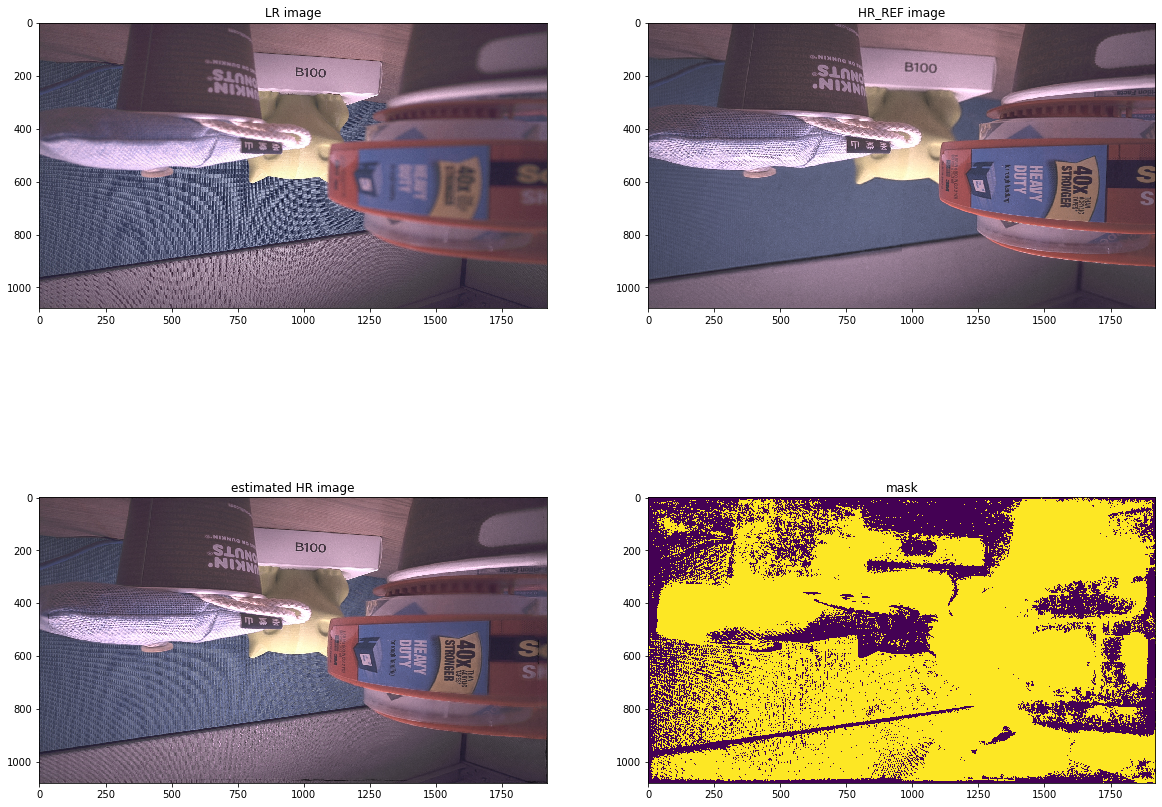

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(a) #cv2.resize(a, (896, 512))
ax[0][0].set_title('LR image')
ax[0][1].imshow(b)
ax[0][1].set_title('HR_REF image')
ax[1][0].imshow(c)
ax[1][0].set_title('estimated HR image')
ax[1][1].imshow(mask[..., 0]>0.3)
ax[1][1].set_title('mask')
plt.show()

In [11]:
cv2.imwrite("/home/qian/Desktop/7943_awnet.jpg", c[..., ::-1] * 255.0)

True

In [8]:
a = cv2.imread("rl_frames/9985oimg_04.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("rl_frames/9985_memo_03.jpg")[..., ::-1]/255.#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
aa = cv2.resize(a, (896, 512))[np.newaxis]
bb = cv2.resize(b, (896, 512))[np.newaxis]
aa = torch.Tensor(aa.transpose(0, 3, 1, 2)).cuda()
bb = torch.Tensor(bb.transpose(0, 3, 1, 2)).cuda()
# imshow(utils.make_grid(a))
# imshow(utils.make_grid(b))
# ccs = []
# wws = []
# for i in range(16):
#     cc, ww, mask = fuseTwoImages(aa[i:i+1], bb[i:i+1])
#     ccs.append(cc[0])
#     wws.append(ww[0])
# cc = torch.stack(ccs)
# ww = torch.stack(wws)
torch.cuda.synchronize()
start_time = time.time()
cc, ww, mm = fuseTwoImages(aa, bb)
torch.cuda.synchronize()
print("runtime:", time.time()-start_time)

# c = depatchize(cc.cpu().detach().numpy().transpose(0, 2, 3, 1))
# warp = depatchize(ww.cpu().detach().numpy().transpose(0, 2, 3, 1))
c = cc.cpu().detach().numpy().transpose(0, 2, 3, 1)[0]
warp = ww.cpu().detach().numpy().transpose(0, 2, 3, 1)[0]
mask = mm.cpu().detach().numpy().transpose(0, 2, 3, 1)[0]

runtime: 0.5064980983734131


In [9]:
# tobeanaly = mask[..., -1].flatten()
# print(tobeanaly.max(), tobeanaly.min(), tobeanaly.mean(), np.median(tobeanaly))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


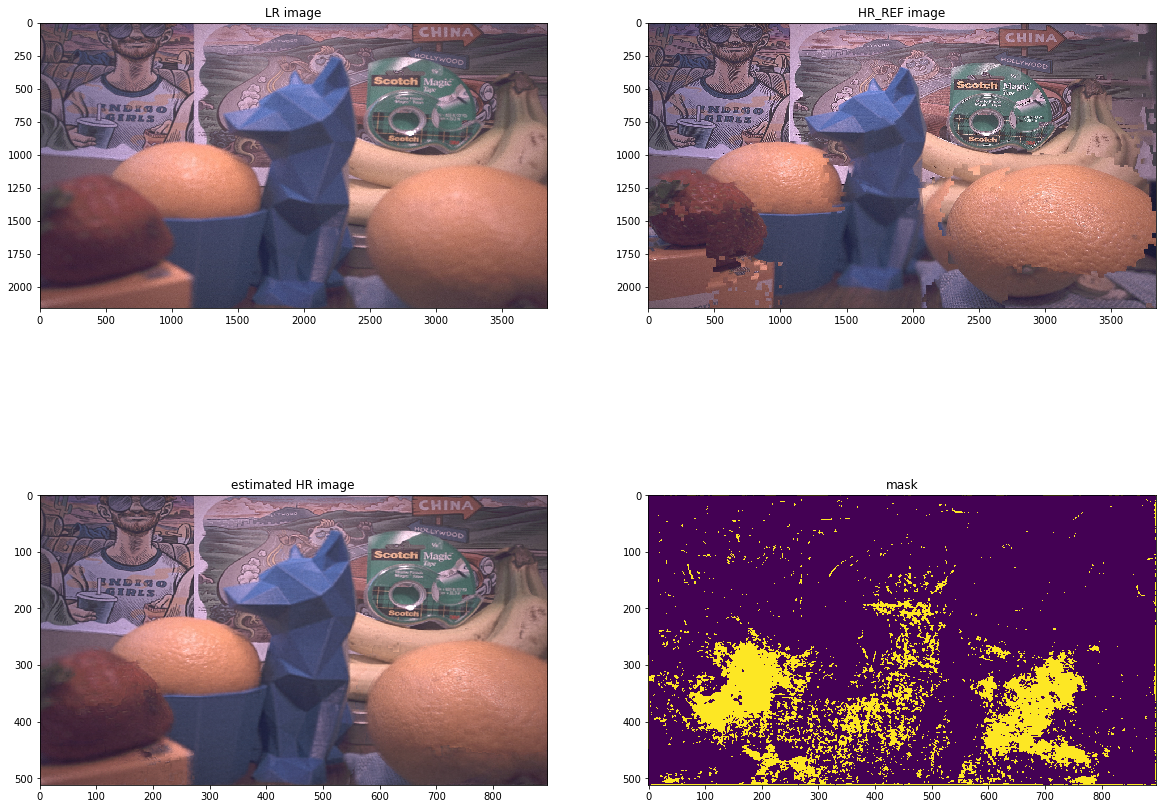

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow(a) #cv2.resize(a, (896, 512))
ax[0][0].set_title('LR image')
ax[0][1].imshow(b)
ax[0][1].set_title('HR_REF image')
ax[1][0].imshow(c)
ax[1][0].set_title('estimated HR image')
ax[1][1].imshow(mask[..., 0] > 0.3)
ax[1][1].set_title('mask')
plt.show()

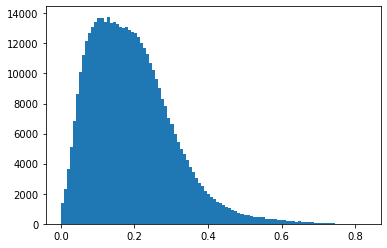

In [11]:
plt.hist(mask[mask>0].flatten(), 100)
plt.show()

In [12]:
# cv2.imwrite("rl_frames/9985_mask_04.jpg", np.clip(mask+1, 0, 1)*255.0)

In [13]:
# a2 = cv2.blur(a,(9,9))
# plt.imshow(a2)

In [14]:
# aa = patchize(a2)
# aa = torch.Tensor(aa.transpose(0, 3, 1, 2)).cuda()

# ccs = []
# wws = []
# for i in range(16):
#     cc, ww, mask = fuseTwoImages(aa[i:i+1], bb[i:i+1])
#     ccs.append(cc[0])
#     wws.append(ww[0])
# cc = torch.stack(ccs)
# ww = torch.stack(wws)

# c = depatchize(cc.cpu().detach().numpy().transpose(0, 2, 3, 1))
# c = np.clip(c, 0, 1)
# warp = depatchize(ww.cpu().detach().numpy().transpose(0, 2, 3, 1))

# fig, ax = plt.subplots(2, 2, figsize=(20, 16))
# ax[0][0].imshow(a2) #cv2.resize(a, (896, 512))
# ax[0][0].set_title('LR image')
# ax[0][1].imshow(b)
# ax[0][1].set_title('HR_REF image')
# ax[1][0].imshow(c)
# ax[1][0].set_title('estimated HR image')
# ax[1][1].imshow(warp)
# ax[1][1].set_title('warped')
# plt.show()